Importing Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [22]:
# Loading the weekly sales dataset
sales_data = pd.read_csv('/Users/tomiwa/sales_data.csv')  

# Displaying basic information about the dataset
print(sales_data.info())
print(sales_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  

Data Preprocessing

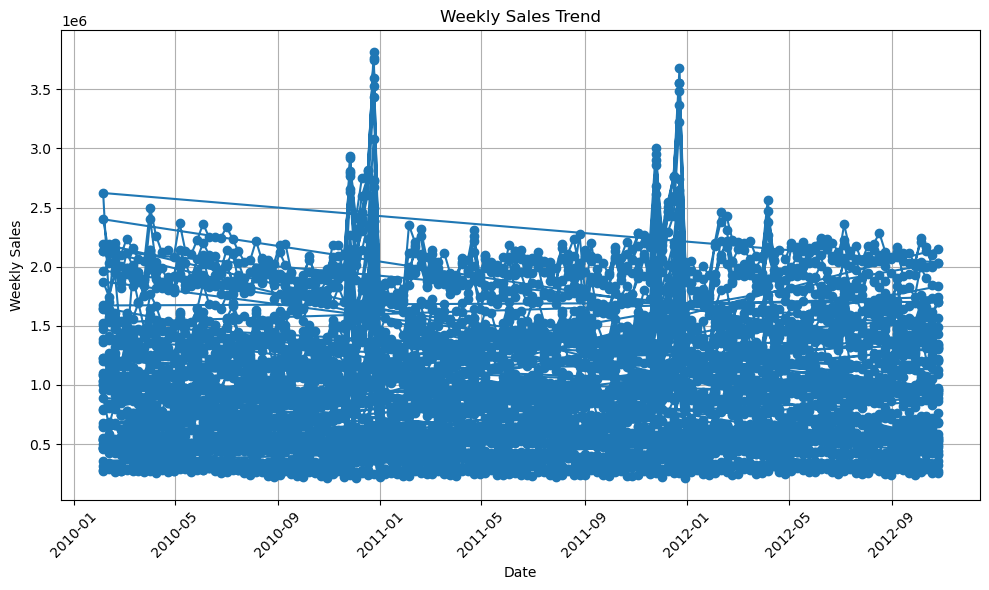

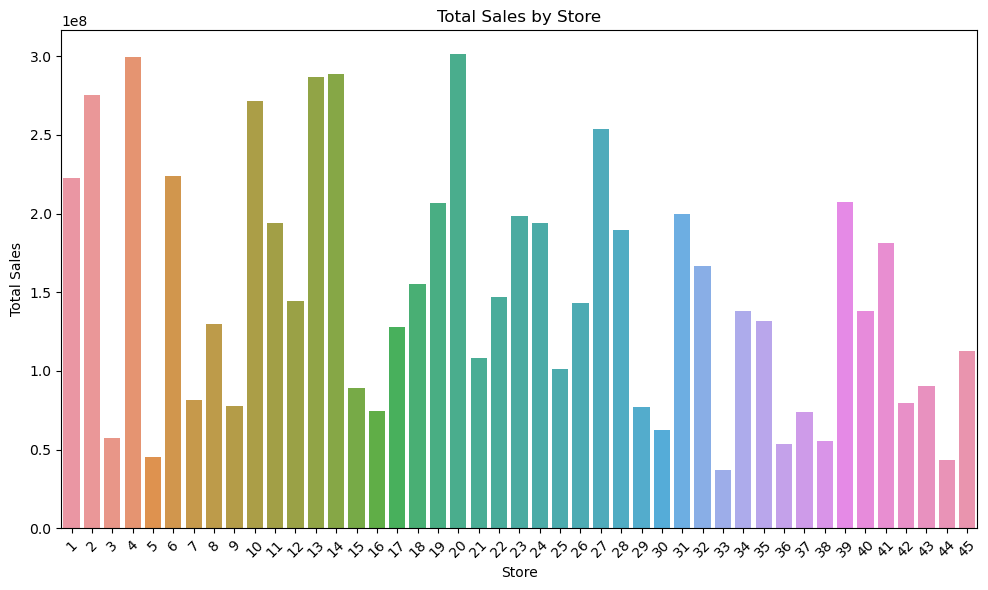

In [23]:
# Converting date column to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

# Visualizing the sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Date'], sales_data['Weekly_Sales'], marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyzing sales by store
store_sales = sales_data.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales, x='Store', y='Weekly_Sales')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analyzing the impact of holidays

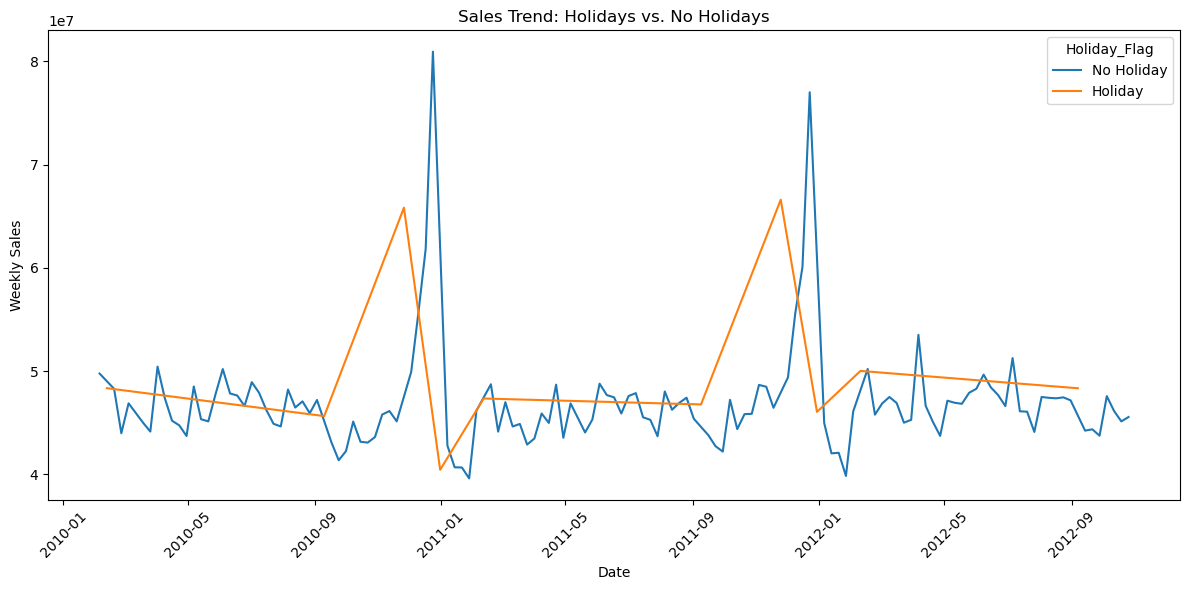

In [24]:
# Creating a new column to indicate if the week has a holiday
sales_data['Holiday_Flag'] = sales_data['Holiday_Flag'].map({1: 'Holiday', 0: 'No Holiday'})

# Analyzing sales during holidays
holiday_sales = sales_data.groupby(['Date', 'Holiday_Flag'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=holiday_sales, x='Date', y='Weekly_Sales', hue='Holiday_Flag')
plt.title('Sales Trend: Holidays vs. No Holidays')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Analysing External Factors 

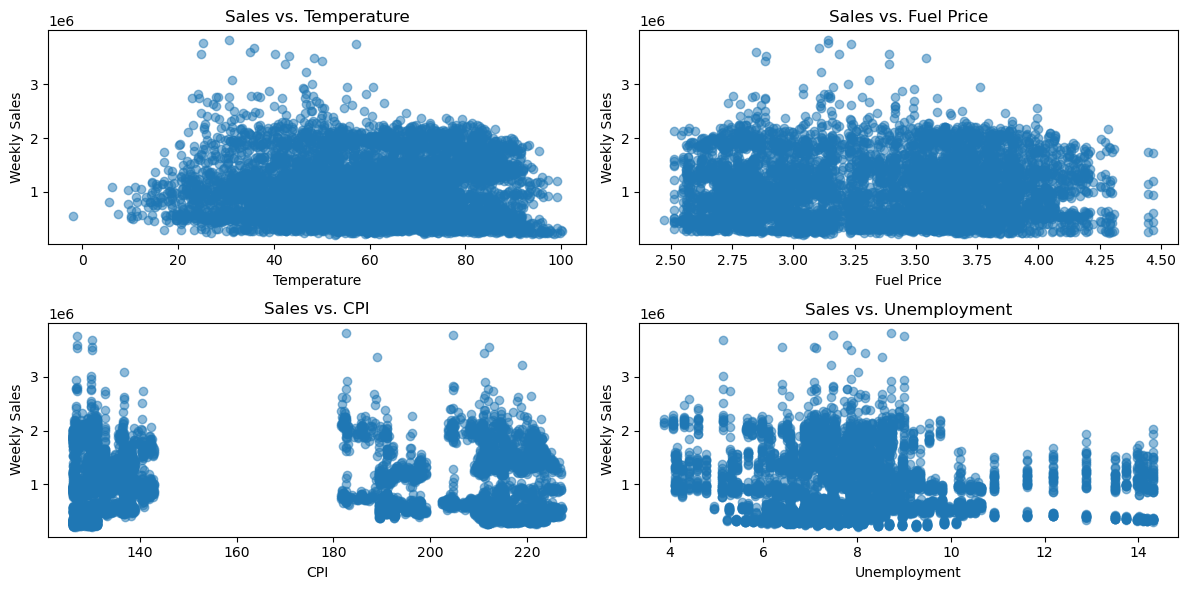

In [25]:
# Creating scatter plots for external factors vs. sales
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(sales_data['Temperature'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title('Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

plt.subplot(2, 2, 2)
plt.scatter(sales_data['Fuel_Price'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title('Sales vs. Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

plt.subplot(2, 2, 3)
plt.scatter(sales_data['CPI'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title('Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')

plt.subplot(2, 2, 4)
plt.scatter(sales_data['Unemployment'], sales_data['Weekly_Sales'], alpha=0.5)
plt.title('Sales vs. Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()
